# From Socrates to Siri
Don't worry, you're in the right place! We are going to use modern data science tools and machine learning to look at virtues in the dialogue Crito. When we meet tomorrow, all our code will be uploaded here for us to walk through together.


You don't have to have a background in coding, data science, or understand all of the code we write, just be curious!

This is where we will be coding during the workshop. See you soon!

To run the code click open in playground!

In [0]:
# we are going to 'run' this cell to import the python libraries we will use
from collections import Counter
import matplotlib.pyplot as plt
import pandas as pd
import requests
import re

#Now let's take a look at Crito
We are starting with a small text (a single dialogue), but the same principles apply for large datasets.

In [0]:
# code to get the text from project guntenburg, it's a great resource to check out!
socrates = requests.get('http://www.gutenberg.org/cache/epub/1657/pg1657.txt').text[18864:-66]

# let's take a look at what we have
socrates

"SOCRATES:  Why have you come at this hour, Crito? it must be quite early.\r\n\r\nCRITO:  Yes, certainly.\r\n\r\nSOCRATES:  What is the exact time?\r\n\r\nCRITO:  The dawn is breaking.\r\n\r\nSOCRATES:  I wonder that the keeper of the prison would let you in.\r\n\r\nCRITO:  He knows me because I often come, Socrates; moreover.  I have done\r\nhim a kindness.\r\n\r\nSOCRATES:  And are you only just arrived?\r\n\r\nCRITO:  No, I came some time ago.\r\n\r\nSOCRATES:  Then why did you sit and say nothing, instead of at once\r\nawakening me?\r\n\r\nCRITO:  I should not have liked myself, Socrates, to be in such great\r\ntrouble and unrest as you are--indeed I should not:  I have been watching\r\nwith amazement your peaceful slumbers; and for that reason I did not awake\r\nyou, because I wished to minimize the pain.  I have always thought you to\r\nbe of a happy disposition; but never did I see anything like the easy,\r\ntranquil manner in which you bear this calamity.\r\n\r\nSOCRATES:  Why,

### Pretty messy!
In order to make sense of it and draw insights we are goint to process the text.

## Start in the 50's, using python to make rules!

### Let's take a couple sentences at first and talk about formal languages

In [0]:
socrates_1 = 'Why have you come at this hour, Crito? it must be quite early.'
crito_1 = 'Yes, certainly.'
socrates_2 ='What is the exact time?'
crito_2 = 'The dawn is breaking.'
socrates_3 =' I wonder that the keeper of the prison would let you in.'

Remember python is a formal language like math - meaning that it's just a set of operations that a computer can perform functions on. Why is this important?

In [0]:
# in python the string (aka letter) is not the same if it is lower case or capitalized

# this is what the computer'equates' as true
print('i' == 'i')

True


In [0]:
# will this be false or true?
print('i' == 'I')

False


In [0]:
# will this be false or true?
print('Yes, certainly.' == 'Yes, certainly!')

False


With this in mind, let's go back to Crito.

### The next blocks of code are for 'cleaning' the text

In [0]:
# this code block is getting our 'natural' words in a format we can use a 'formal' language with!

def format_words():
    return [x.replace("CRITO:", "CRITOtalking").replace("SOCRATES:", "SOCRATEStalking").lower() for x in socrates.split()]
  
def no_punctuation(dialogue):
    cleaned_words = []
    for word in dialogue:
        s = re.sub(r'[^\w]','',word) 
        cleaned_words.append(s)
    return cleaned_words
crito = no_punctuation(format_words()) 

In [0]:
# this code block is to get all of socrates and critos words separately

# making the list into a string
string =' '.join(crito)
# sentences is a list of sentences of the dialogue as strings
sentences = re.split(r'[a-z]+talking', string)[1:]  

def get_crito_words():
    list_words = []
    for i in range(len(sentences)):
        if i % 2 ==0:
          pass
        else:
          list_words.append(sentences[i])
    return list_words
  
def get_socrates_words():
    s_list_words = []
    for i in range(len(sentences)):
      if i % 2==0:
        s_list_words.append(sentences[i])
    return s_list_words

# socrates_sentences is just a list of socrates' sentences as strings
socrates_sentences = get_socrates_words()
# crito_sentences is just a list of crito's sentences as strings
crito_sentences = get_crito_words()
print('The first sentence of the dialogue is:', sentences[0])

The first sentence of the dialogue is:  why have you come at this hour crito it must be quite early 


### What do you think the most common words are?

Also, the most common words **meaningful** or **important** to the text?

In [0]:
counts = Counter(crito)
ordered_counts = sorted(counts.items(), key=lambda k: k[1], reverse = True)

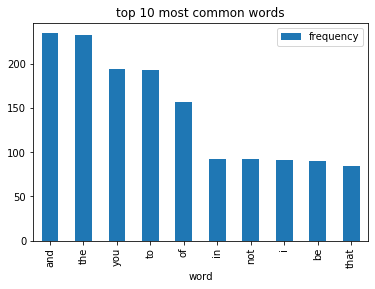

In [0]:
#let's look at the ten more common words...
df_most_common = pd.DataFrame(ordered_counts[:10], columns=['word', 'frequency'])
df_most_common.plot(kind='bar', x='word', title='top 10 most common words')

Can you tell what this text is about?

Let's look at the top 25 words!

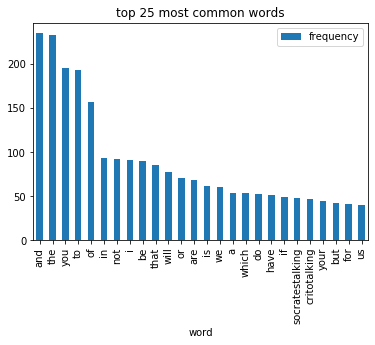

In [0]:
more_words = pd.DataFrame(ordered_counts[:26], columns=['word', 'frequency'])
more_words.plot(kind='bar', x='word', title='top 25 most common words')

Still not very descriptive. These words (**and**, **the**, **of**) are called stop words in natural langauge processing.



In [0]:
# take out stop words
stop_words = ["i", "me", "my", "myself", "we", "our", "ours", "ourselves", "you", "your", "yours", "yourself", "yourselves", "he", "him", "his", "himself", "she", "her", "hers", "herself", "it", "its", "itself", "they", "them", "their", "theirs", "themselves", "what", "which", "who", "whom", "this", "that", "these", "those", "am", "is", "are", "was", "were", "be", "been", "being", "have", "has", "had", "having", "do", "does", "did", "doing", "a", "an", "the", "and", "but", "if", "or", "because", "as", "until", "while", "of", "at", "by", "for", "with", "about", "against", "between", "into", "through", "during", "before", "after", "above", "below", "to", "from", "up", "down", "in", "out", "on", "off", "over", "under", "again", "further", "then", "once", "here", "there", "when", "where", "why", "how", "all", "any", "both", "each", "few", "more", "most", "other", "some", "such", "no", "nor", "not", "only", "own", "same", "so", "than", "too", "very", "s", "t", "can", "will", "just", "don", "should", "now", "like", " ", ""]

# now remove these from the from our corpus
remove_stop_words = []
for i in range(len(ordered_counts)):
    if ordered_counts[i][0] not in stop_words:
      remove_stop_words.append((ordered_counts[i][0], ordered_counts[i][1]))

In [0]:
# then graph the new dictionary of words!
no_stop_words_graph = pd.DataFrame(remove_stop_words[:25], columns=['word', 'frequency'])
no_stop_words_graph.plot(kind='bar', x='word', title='top 25 most common words')

### Can we find a pattern in each speaker?

In [0]:
# a function to get the word counts for each speaker
def words_counts_by_speaker(speaker_sentences):
  speaker_words_list = []
  for i in range(len(speaker_sentences)):
    speaker_words_list.append(speaker_sentences[i].split(' '))
    speaker_words = [val for sublist in speaker_words_list for val in sublist]

  # get word counts for crito
  speaker_counts = Counter(speaker_words)
  ordered_speaker_counts = sorted(speaker_counts.items(), key=lambda k: k[1], reverse = True)

  # now remove these from the from our corpus for crito
  remove_stop_words_speaker = []
  for i in range(len(speaker_counts)):
    if ordered_speaker_counts[i][0] not in stop_words:
      remove_stop_words_speaker.append((ordered_speaker_counts[i][0], ordered_speaker_counts[i][1]))
  return remove_stop_words_speaker

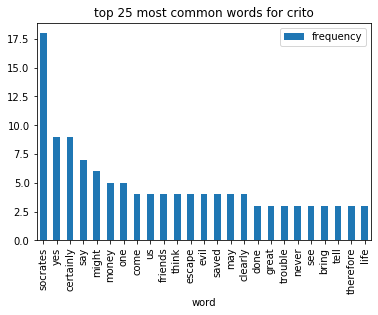

In [0]:
no_stop_words_crito_graph = pd.DataFrame(words_counts_by_speaker(crito_sentences)[:25], columns=['word', 'frequency'])
no_stop_words_crito_graph.plot(kind='bar', x='word', title='top 25 most common words for crito')

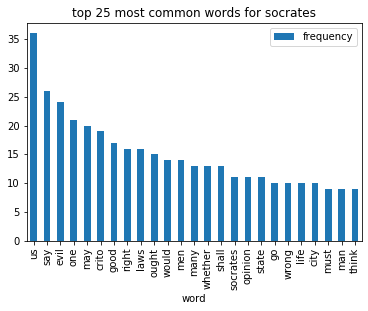

In [0]:
no_stop_words_socrates_graph = pd.DataFrame(words_counts_by_speaker(socrates_sentences)[:25], columns=['word', 'frequency'])
no_stop_words_socrates_graph.plot(kind='bar', x='word', title='top 25 most common words for socrates')

In [0]:
print("crito's word count", no_stop_words_crito_graph.frequency.sum())
print("socrates' word count", no_stop_words_socrates_graph.frequency.sum())
# words_counts_by_speaker(crito_sentences)[:25]

crito's word count 122
socrates' word count 377


Did we take everything into consideration?

## Modern techinques - Looking at sentiment and summarization

### Sentiment with Textblob
Textblob is a python library for natural language processing!

In [0]:
# we are using the nltk library and textblob
import nltk
nltk.download("popular")
from textblob import TextBlob

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cmudict.zip.
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gazetteers.zip.
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/genesis.zip.
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/gutenberg.zip.
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/inaugural.zip.
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/movie_reviews.zip.
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/names.zip.
[nltk_data]    | Downloading package shakespeare to /root/nltk_data...
[nlt

In [0]:
# let's test it out
movie_sent = TextBlob("I would love to NOT go to the movies!")
spoiler_sent = TextBlob("This is terrible!!")
movie_sent.sentiment

Sentiment(polarity=0.625, subjectivity=0.6)

In [0]:
word_sent = TextBlob("I come to bring you a message which is sad and painful; not, as I believe, to yourself, but to all of us who are your friends, and saddest of all to me.")
word_sent.sentiment

Sentiment(polarity=-0.6, subjectivity=0.95)

While this is a very cool use case of natural language processing it is important to remember that the sentiment we get from a machine learning model can be biased. This is based on what text is used to *train* the model.

### summarization

In [0]:
from gensim.summarization.summarizer import summarize

In [0]:
socrates_last = '''
Then will they not say: ‘You, Socrates, are breaking the covenants and agreements which you made with us at your leisure, not in any haste or under any compulsion or deception, but after you have had seventy years to think of them, during which time you were at liberty to leave the city, if we were not to your mind, or if our covenants appeared to you to be unfair. You had your choice, and might have gone either to Lacedaemon or Crete, both which states are often praised by you for their good government, or to some other Hellenic or foreign state. Whereas you, above all other Athenians, seemed to be so fond of the state, or, in other words, of us, her laws (and who would care about a state which has no laws?), that you never stirred out of her; the halt, the blind, the maimed were not more stationary in her than you were. And now you run away and forsake your agreements. Not so, Socrates, if you will take our advice; do not make yourself ridiculous by escaping out of the city.

‘For just consider, if you transgress and err in this sort of way, what good will you do either to yourself or to your friends? That your friends will be driven into exile and deprived of citizenship, or will lose their property, is tolerably certain; and you yourself, if you fly to one of the neighbouring cities, as, for example, Thebes or Megara, both of which are well governed, will come to them as an enemy, Socrates, and their government will be against you, and all patriotic citizens will cast an evil eye upon you as a subverter of the laws, and you will confirm in the minds of the judges the justice of their own condemnation of you. For he who is a corrupter of the laws is more than likely to be a corrupter of the young and foolish portion of mankind. Will you then flee from well-ordered cities and virtuous men? and is existence worth having on these terms? Or will you go to them without shame, and talk to them, Socrates? And what will you say to them? What you say here about virtue and justice and institutions and laws being the best things among men? Would that be decent of you? Surely not. But if you go away from well-governed states to Crito’s friends in Thessaly, where there is great disorder and licence, they will be charmed to hear the tale of your escape from prison, set off with ludicrous particulars of the manner in which you were wrapped in a goatskin or some other disguise, and metamorphosed as the manner is of runaways; but will there be no one to remind you that in your old age you were not ashamed to violate the most sacred laws from a miserable desire of a little more life? Perhaps not, if you keep them in a good temper; but if they are out of temper you will hear many degrading things; you will live, but how?—as the flatterer of all men, and the servant of all men; and doing what?—eating and drinking in Thessaly, having gone abroad in order that you may get a dinner. And where will be your fine sentiments about justice and virtue? Say that you wish to live for the sake of your children—you want to bring them up and educate them—will you take them into Thessaly and deprive them of Athenian citizenship? Is this the benefit which you will confer upon them? Or are you under the impression that they will be better cared for and educated here if you are still alive, although absent from them; for your friends will take care of them? Do you fancy that if you are an inhabitant of Thessaly they will take care of them, and if you are an inhabitant of the other world that they will not take care of them? Nay; but if they who call themselves friends are good for anything, they will—to be sure they will.

‘Listen, then, Socrates, to us who have brought you up. Think not of life and children first, and of justice afterwards, but of justice first, that you may be justified before the princes of the world below. For neither will you nor any that belong to you be happier or holier or juster in this life, or happier in another, if you do as Crito bids. Now you depart in innocence, a sufferer and not a doer of evil; a victim, not of the laws, but of men. But if you go forth, returning evil for evil, and injury for injury, breaking the covenants and agreements which you have made with us, and wronging those whom you ought least of all to wrong, that is to say, yourself, your friends, your country, and us, we shall be angry with you while you live, and our brethren, the laws in the world below, will receive you as an enemy; for they will know that you have done your best to destroy us. Listen, then, to us and not to Crito.’

This, dear Crito, is the voice which I seem to hear murmuring in my ears, like the sound of the flute in the ears of the mystic; that voice, I say, is humming in my ears, and prevents me from hearing any other. And I know that anything more which you may say will be vain. Yet speak, if you have anything to say.'''

In [0]:
summarize(socrates_last)

'Then will they not say: ‘You, Socrates, are breaking the covenants and agreements which you made with us at your leisure, not in any haste or under any compulsion or deception, but after you have had seventy years to think of them, during which time you were at liberty to leave the city, if we were not to your mind, or if our covenants appeared to you to be unfair.\nThat your friends will be driven into exile and deprived of citizenship, or will lose their property, is tolerably certain; and you yourself, if you fly to one of the neighbouring cities, as, for example, Thebes or Megara, both of which are well governed, will come to them as an enemy, Socrates, and their government will be against you, and all patriotic citizens will cast an evil eye upon you as a subverter of the laws, and you will confirm in the minds of the judges the justice of their own condemnation of you.\nWhat you say here about virtue and justice and institutions and laws being the best things among men?\nBut if 

In [0]:
print( "The length of our summary is", len(summarize(socrates_last)), "charaters")
print( "The length of the original text is", len(socrates_last), "charaters")

The length of our summary is 2233 charaters
The length of the original text is 4899 charaters


Let's summarize the whole text!

In [0]:
print(summarize(socrates))

SOCRATES:  Why have you come at this hour, Crito?
SOCRATES:  I wonder that the keeper of the prison would let you in.
CRITO:  He knows me because I often come, Socrates; moreover.
CRITO:  I should not have liked myself, Socrates, to be in such great
SOCRATES:  Why, Crito, when a man has reached my age he ought not to be
CRITO:  And yet other old men find themselves in similar misfortunes, and
SOCRATES:  That is true.
CRITO:  I come to bring you a message which is sad and painful; not, as I
CRITO:  No, the ship has not actually arrived, but she will probably be
left her there; and therefore to-morrow, Socrates, will be the last day of
SOCRATES:  Very well, Crito; if such is the will of God, I am willing; but
SOCRATES:  I will tell you.
CRITO:  Yes; that is what the authorities say.
SOCRATES:  But I do not think that the ship will be here until to-morrow;
SOCRATES:  There appeared to me the likeness of a woman, fair and comely,
CRITO:  What a singular dream, Socrates!
SOCRATES:  There ca

In [0]:
print( "The length of our summary is", len(summarize(socrates)), "charaters")
print( "The length of the original text is", len(socrates), "charaters")

The length of our summary is 6198 charaters
The length of the original text is 29288 charaters
